In [1]:
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
import decomp_alllevels as deco
from imp import reload
import write_netCDF as write
import amoc_plots as aplot
import tools
import xz_tools as xz_tools
import numpy.ma as ma
from scipy.interpolate import interp1d
import matplotlib.colors as mplc
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [11]:
os.chdir("/work/mh0256/m300522/data_storm/tape/snapshots")

In [53]:
vel_mag = tools.netread_data('vel_mag_box.nc','uko')
lat,lon,depth = tools.netread_grid('vel_mag_box.nc','lat','lon','depth_14')
vel_mag  = np.ma.masked_where(vel_mag == 0, vel_mag,copy=True)

In [45]:
from matplotlib.colors import LinearSegmentedColormap
from pylab import *
from numpy import *
class nlcmap(LinearSegmentedColormap):
    name = 'nlcmap'
    def __init__(self, cmap, levels):
        self.cmap = cmap
        #self.N = cmap.N
        self.monochrome = self.cmap.monochrome
        self.levels = asarray(levels, dtype='float64')
        self._x = self.levels / self.levels.max()
        self._y = linspace(0.0, 1.0, len(self.levels))
  
  #@MRR Need to add **kw for 'bytes'
    def __call__(self, xi, alpha=1.0, **kw):
        yi = interp(xi, self._x, self._y)
        return self.cmap(yi, alpha)

In [64]:
if __name__ == '__main__':
    levels = [0, 1, 2, 3, 5, 8, 15, 30]
    cmap_lin = plt.cm.RdBu_r
    cmap_nonlin = nlcmap(cmap_lin, levels)

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


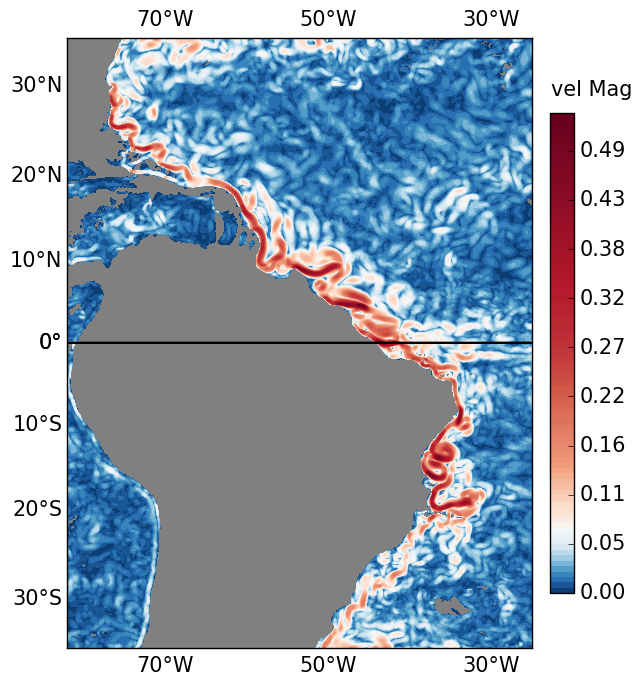

In [71]:
fig = plt.figure(figsize=(6,8))
a=fig.add_subplot(111,axisbg='grey')
m = Basemap(llcrnrlon=-82,
            llcrnrlat=-35,
            urcrnrlon=-25,
            urcrnrlat=35,
            projection='merc',
            )
#m.drawcoastlines()

#m.fillcontinents(color='grey')
parallels = (0.,0.)
m.drawparallels(parallels,labels=[1,0,0,1],linewidth=1.5,dashes=[400,1],fontsize=15)
m.drawparallels((-30,-20,-10,10,20,30),labels=[1,0,0,0], linewidth=0.0,fontsize=15)
m.drawmeridians((-70,-50,-30),labels=[0,0,1,1], linewidth=0.0,fontsize=15)
x, y =m(lon, lat)
v = np.linspace(1,1.5,100)
fplot=m.contourf(x,y,(vel_mag[55,:,:]),100,cmap=cmap_nonlin)
cb_coord = [0.93,0.2,0.04,0.6]
cbar_ax = fig.add_axes(cb_coord)
cb=plt.colorbar(orientation="vertical",cax=cbar_ax,format='%.2f')
cb.set_label('vel Mag', labelpad=-25, y=1.07, rotation=0,fontsize=15)
cb.ax.tick_params(labelsize=15)
plt.savefig("/work/mh0256/m300522/data_storm/eddies/2000s/figs/snap_vel_mag.png",bbox_inches = 'tight')

plt.show()